In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR

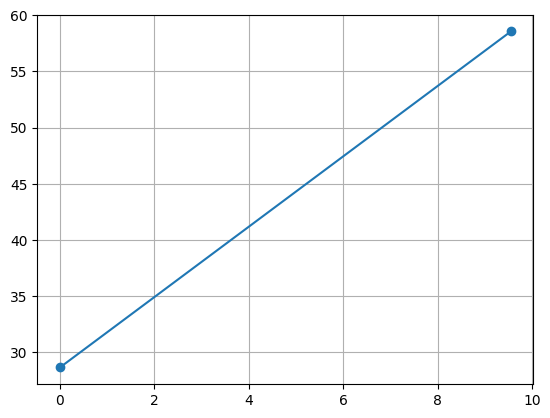

In [2]:
with open ("vin.txt") as f: 
    txt = f.read().split("\n")

inp= []
ADC =[]
arr = []
nb=-1
for l in txt:
    if "#" in l: 
        
        inp.append(float(l.split("=")[-1]))
        if len(arr):
            ADC.append( np.array(arr).astype(float).mean())
            arr = []
    if "|" in l:
        lar= l.split(" ")
        arr .append(lar[nb])
ADC.append( np.array(arr).astype(float).mean())
plt.plot(inp, ADC, marker = "o")
plt.grid()

In [3]:
#uint16_t
2**16, 2**32

(65536, 4294967296)

# Vout 

Vout = a*ADC + b ==> Vout = 0.030808749853087996*ADC + -0.09760603041414129
a 0.030808749853087996 b -0.09760603041414129
============= round a and b ============
Vout = a*ADC + b ==> Vout = 0.03081*ADC + -0.09761
a 0.03081 b -0.09761


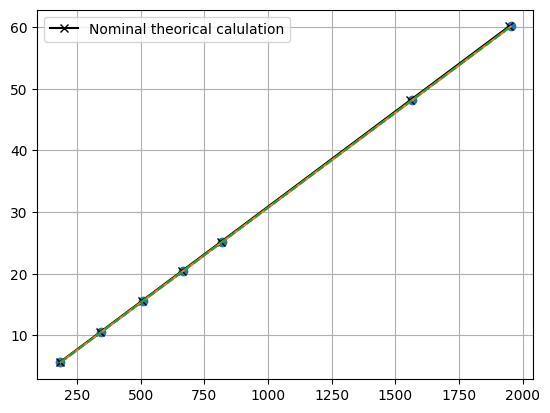

In [14]:
with open ("vout.txt") as f: 
    txt = f.read().split("\n")

inp= []
ADC =[]
arr = []
nb= 3
for l in txt:
    if "#" in l: 
        
        inp.append(float(l.split("=")[-1]))
        if len(arr):
            ADC.append( np.array(arr).astype(float).mean())
            arr = []
    if "|" in l:
        lar= l.split(" ")
        arr .append(lar[nb])
        
ADC.append( np.array(arr).astype(float).mean())


X = np.array(ADC).reshape((-1,1))
y = np.array(inp)
#y = y*1e6




plt.plot(X, y, marker = "o")

xther= y*(1.5/(1.5+56))*(2**12/3.3)
plt.plot(xther, y, marker = "x",c="k" , label = "Nominal theorical calulation")


model = LR()

model .fit(X, y)
yh= model.predict(X)
plt.plot(X, yh)



a = model.coef_[0]
b= model.intercept_
print(f"Vout = a*ADC + b ==> Vout = {a}*ADC + {b}")
print("a", a, "b", b)



#a= np.round(a)
a =np.round(a, 5)
b = np.round(b, 5)
print("============= round a and b ============")
print(f"Vout = a*ADC + b ==> Vout = {a}*ADC + {b}")
print("a", a, "b", b)
plt.plot(X, a*X+b, linestyle= "--")
plt.grid()
plt.legend()

 Vout_mean = 48.1232,  Vout_multi = 48.1200, error = 0.0066%


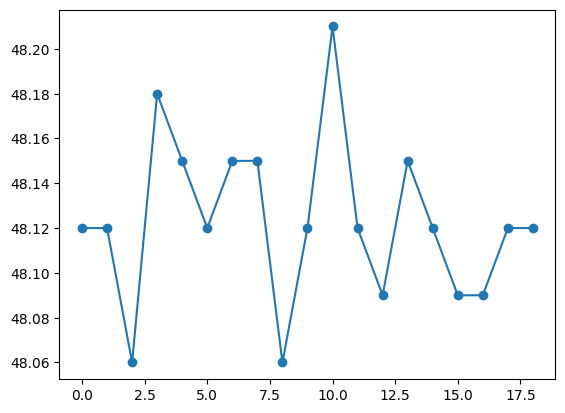

In [20]:
txt = """dt(us)=17 | 562 1565 48.12 950 2547 2307 233 4084 58
dt(us)=17 | 561 1565 48.12 951 2548 2307 233 4084 58
dt(us)=17 | 567 1563 48.06 950 2547 2307 233 4084 57
dt(us)=16 | 558 1567 48.18 951 2548 2307 230 4083 57
dt(us)=16 | 552 1566 48.15 949 2546 2307 234 4085 58
dt(us)=17 | 551 1565 48.12 949 2546 2307 231 4083 58
dt(us)=17 | 550 1566 48.15 950 2547 2306 233 4083 58
dt(us)=17 | 547 1566 48.15 951 2547 2306 230 4083 57
dt(us)=16 | 545 1563 48.06 950 2550 2307 232 4082 59
dt(us)=17 | 542 1565 48.12 951 2549 2307 230 4083 57
dt(us)=17 | 543 1568 48.21 952 2547 2307 232 4084 59
dt(us)=17 | 542 1565 48.12 950 2546 2306 232 4085 59
dt(us)=17 | 540 1564 48.09 950 2548 2306 231 4083 58
dt(us)=17 | 536 1566 48.15 951 2548 2306 232 4084 57
dt(us)=16 | 535 1565 48.12 949 2547 2307 234 4083 58
dt(us)=17 | 536 1564 48.09 949 2546 2306 232 4085 58
dt(us)=16 | 535 1564 48.09 951 2549 2307 232 4083 58
dt(us)=17 | 535 1565 48.12 950 2545 2305 231 4084 58
dt(us)=17 | 536 1565 48.12 950 2546 2306 232 4084 57""".split("\n")
arr=[]
for l in txt:
    arr.append(l.split(" ")[4])
arr=np.array(arr).astype(float)
plt.plot(arr, marker= "o")
Vout_mean = arr.mean()
Vout_multi= 48.12
error = 100*(Vout_mean-Vout_multi)/Vout_multi
print(f" Vout_mean = { Vout_mean:.4f},  Vout_multi = { Vout_multi:.4f}, error = {error:.4f}%")

In [27]:
Rminon = 20
Rminon = 33
Tminon = Rminon /10
Fmax = 1e3/(Tminon*2)
Fmax, "khz"

(151.51515151515153, 'khz')